- 基础配置
- 张量处理
- 张量计算
- torch.nn
- Pipeline

## 基础配置

### 检查 PyTorch 版本

In [1]:
# torch版本
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.__version__

'1.7.0+cu101'

In [3]:
# cuda版本
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.get_device_name(0))

10.0.130
7602
GeForce RTX 2080 Ti


## 张量处理

### 张量基本信息

In [60]:
# 张量的创建
# torch.Tensor(size)
# .random_() | .resize_() | .zero_() | .mul_()
example = torch.Tensor(2, 3, 4)
print(example)
print(example.random_(10)) # 0-9
r = torch.Tensor(example)
r.resize_(2, 4, 3)
print(r)
print(r.zero_())
print(example) # 值全变为0，size不变

tensor([[[-7.1653e+26,  4.5752e-41, -7.1653e+26,  4.5752e-41],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])
tensor([[[7., 1., 7., 6.],
         [3., 4., 7., 7.],
         [5., 0., 8., 3.]],

        [[0., 2., 9., 5.],
         [8., 2., 5., 1.],
         [2., 4., 5., 2.]]])
tensor([[[7., 1., 7.],
         [6., 3., 4.],
         [7., 7., 5.],
         [0., 8., 3.]],

        [[0., 2., 9.],
         [5., 8., 2.],
         [5., 1., 2.],
         [4., 5., 2.]]])
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 

In [5]:
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)
n.mul_(2)
print(n_np)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])
[0 2 4 6 8]


In [3]:
# torch.Tensor创建一维张量
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [8]:
print(f'dim: {v.dim()}, size: {v.size()}, {v.size()[0]}')

dim: 1, size: torch.Size([4]), 4


In [11]:
# torch.Tensor创建二维张量
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [12]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [15]:
# 矩阵转置: .t() | .transpose(0, 1)
print(m.t())
print(m.transpose(0, 1))

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])
tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])


In [16]:
# 从矩阵中获取值
print(m[0][2])
print(m[0, 2])
print(m[:, 1])
print(m[:, [1]])
print(m[[0], :])
print(m[0, :])

tensor(3.)
tensor(3.)
tensor([5., 2.])
tensor([[5.],
        [2.]])
tensor([[2., 5., 3., 7.]])
tensor([2., 5., 3., 7.])


In [5]:
# torch.randn(size)
a = torch.randn(1, 3)
print(a)
print(a.shape)

tensor([[ 0.6320, -0.0545,  0.9207]])
torch.Size([1, 3])


In [8]:
# torch.rand(size)
print(torch.rand(2,2))
input = torch.tensor([1,2,3,4]).float() 
print(torch.rand_like(input)) # 等价于torch.rand(input_size))
print(torch.rand(4))

tensor([[0.6492, 0.2801],
        [0.0519, 0.4007]])
tensor([0.8783, 0.1789, 0.0026, 0.4946])
tensor([0.9872, 0.0376, 0.4982, 0.6448])


In [6]:
# torch.tensor(example)
a=torch.tensor([1,2,3,4])
print(a)

tensor([1, 2, 3, 4])


In [4]:
# torch.zeros | torch.ones
print(torch.zeros(3, 5))
print(torch.ones(3, 2, 5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])


In [7]:
# .new_zeros() | torch.eye(n)
a=torch.tensor([1,2,3,4])
print(a.new_zeros(a.size(0)))
print(a)

e = torch.eye(3)
print(e)
print(e.type())

tensor([0, 0, 0, 0])
tensor([1, 2, 3, 4])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
torch.FloatTensor


In [2]:
# torch.arange()
print(torch.arange(3., 8 + 1))
print(torch.arange(5.7, -2.1, -3))

tensor([3., 4., 5., 6., 7., 8.])
tensor([ 5.7000,  2.7000, -0.3000])


In [3]:
# torch.linspace
print(torch.linspace(3, 8, 20).view(1, -1)) # 包含首尾值

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])


In [14]:
# 张量的统计数据
# .type()/type() | .size()/.shape | .dim() | .numel()
print(example.type())
print(example.size()) # tuple的一个子类  等价于.shape
print(example.dim())
print(example.numel())

torch.FloatTensor
torch.Size([2, 3, 4])
3
24


In [6]:
a=torch.tensor([1,2,3,4])
print(a)
print(type(a))
print(a.type())

tensor([1, 2, 3, 4])
<class 'torch.Tensor'>
torch.LongTensor


In [38]:
# 对输入的tensor求范数
a = torch.ones((2,3))  #建立tensor torch.ones(2,3)也可
a2 = torch.norm(a)      #默认求2范数
a1 = torch.norm(a,p=1)  #指定求1范数
print(a)
print(a.type())
print(a2)
print(a1)
# 求指定维度上的范数
a = torch.tensor([[1, 2, 3, 4],
        [1, 2, 3, 4]]).float()  #norm仅支持floatTensor,a是一个2*4的Tensor
a0 = torch.norm(a,p=2,dim=0)    #按0维度求2范数
a1 = torch.norm(a,p=2,dim=1)    #按1维度求2范数
print(a0)
print(a1)

a = torch.rand(2,3,4) # torch.rand((2,3,4))也可  得到[0, 1)均匀分布。torch.randn得到标准正态分布
at = torch.norm(a,p=2,dim=1,keepdim=True)   #保持维度
af = torch.norm(a,p=2,dim=1,keepdim=False)  #不保持维度
# dim称为缩减的维度，因为norm运算之后，此维度或者消失或者元素个数变为1
 
print(a.shape)
print(at.shape)
print(af.shape)


tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.FloatTensor
tensor(2.4495)
tensor(6.)
tensor([1.4142, 2.8284, 4.2426, 5.6569])
tensor([5.4772, 5.4772])
torch.Size([2, 3, 4])
torch.Size([2, 1, 4])
torch.Size([2, 4])


In [36]:
# torch.clamp()限制元素值
input = torch.tensor([1,2,3,4])
print(torch.clamp(input, 2, 3)) # 将输入input张量每个元素的夹紧到区间 [min,max]
print(input)

tensor([2, 2, 3, 3])
tensor([1, 2, 3, 4])


### 数据类型转换

In [ ]:
'''
# Set default tensor type. Float in PyTorch is much faster than double.
torch.set_default_tensor_type(torch.FloatTensor)

# dtype=torch.long

# Type convertions.
tensor = tensor.cuda()
tensor = tensor.cpu() | .cpu().data.numpy()/.data.cpu().numpy()  .data是获取tensor    把tensor转换成numpy的格式(array)
tensor = tensor.float()
tensor = tensor.long()

tensor.double()
tensor.byte()
'''

### 将整数标记转换成独热(one-hot)编码

In [47]:
t = torch.tensor([0,1,2,1])
N = t.size(0)
num_classes = 3
one_hot = torch.zeros(N, num_classes).long()
one_hot.scatter_(dim=1, index=torch.unsqueeze(t, dim=1), src=torch.ones(N, num_classes).long()) # 将src中数据根据index中的索引按照dim的方向填进input中，index为src中的每一个数据指明在input中的dim方向上的索引，index、src和input的另外一个dim的大小要一致
print(one_hot)

# scatter_ 放 | gather_ 取
input = [
    [2, 3, 4, 5, 0, 0],
    [1, 4, 3, 0, 0, 0],
    [4, 2, 2, 5, 7, 0],
    [1, 0, 0, 0, 0, 0]
]
input = torch.tensor(input)
length = torch.LongTensor([[4],[3],[5],[1]]) #注意index的类型
out = torch.gather(input, 1, length-1) #index之所以减1,是因为序列维度是从0开始计算的
print(out)

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0]])
tensor([[5],
        [3],
        [7],
        [1]])


### 得到非零/零元素

In [19]:
t = torch.tensor([0,1,2,1])
print(torch.nonzero(t))             # Index of non-zero elements
print(torch.nonzero(t == 0))          # Index of zero elements
print(torch.nonzero(t).size(0))       # Number of non-zero elements
print(torch.nonzero(t == 0).size(0))  # Number of zero elements

tensor([[1],
        [2],
        [3]])
tensor([[0]])
3
1


### torch.Tensor 与 np.ndarray 转换

In [7]:
import numpy as np
# torch.Tensor -> np.ndarray.
ndarray = example.cpu().numpy()
print(type(ndarray))

# np.ndarray -> torch.Tensor.
tensor = torch.from_numpy(ndarray).float()
# tensor = torch.from_numpy(ndarray.copy()).float()  # If ndarray has negative stride
print(type(tensor))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


### 打乱顺序

In [ ]:
'''
tensor = tensor[torch.randperm(tensor.size(0))]  # Shuffle the first dimension
'''

### 水平翻转(逆)

In [8]:
example = torch.Tensor(2, 3, 4, 5)
example

tensor([[[[ 0.0000e+00,  0.0000e+00,  2.0556e+32,  3.0704e-41,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  1.9898e-43,  1.0272e-42,  0.0000e+00,  4.5559e-41]],

         [[ 1.6956e-43,  1.1771e-43,  0.0000e+00,  0.0000e+00,  3.5566e+31],
          [ 3.0704e-41,  7.0065e-45,  0.0000e+00,  9.8567e+30,  3.0704e-41],
          [ 4.0402e+06,  4.5577e-41,  1.5765e-35,  4.5574e-41,  0.0000e+00],
          [ 0.0000e+00,  4.2039e-45,  0.0000e+00,  1.4013e-45,  4.5573e-41]],

         [[ 1.5718e-35,  4.5574e-41,         nan,         nan,  0.0000e+00],
          [ 0.0000e+00,  4.2039e-45,  7.0065e-45,  4.2039e-45,  0.0000e+00],
          [ 1.5765e-35,  4.5574e-41,  1.5766e-35,  4.5574e-41,  7.5504e-06],
          [ 4.5577e-41,         nan,         nan,  0.0000e+00,  0.0000e+00]]],


        [[[ 1.8444e+31,  3.0704e-41,  0.0000e+00,  0.0000e+00,  0.00

In [11]:
example = example[:, :, :, torch.arange(example.size(3) - 1, -1, -1).long()]
example

tensor([[[[ 0.0000e+00,  3.0704e-41,  2.0556e+32,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 4.5559e-41,  0.0000e+00,  1.0272e-42,  1.9898e-43,  0.0000e+00]],

         [[ 3.5566e+31,  0.0000e+00,  0.0000e+00,  1.1771e-43,  1.6956e-43],
          [ 3.0704e-41,  9.8567e+30,  0.0000e+00,  7.0065e-45,  3.0704e-41],
          [ 0.0000e+00,  4.5574e-41,  1.5765e-35,  4.5577e-41,  4.0402e+06],
          [ 4.5573e-41,  1.4013e-45,  0.0000e+00,  4.2039e-45,  0.0000e+00]],

         [[ 0.0000e+00,         nan,         nan,  4.5574e-41,  1.5718e-35],
          [ 0.0000e+00,  4.2039e-45,  7.0065e-45,  4.2039e-45,  0.0000e+00],
          [ 7.5504e-06,  4.5574e-41,  1.5766e-35,  4.5574e-41,  1.5765e-35],
          [ 0.0000e+00,  0.0000e+00,         nan,         nan,  4.5577e-41]]],


        [[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  3.0704e-41,  1.84

### 张量复制

In [ ]:
'''
有三种复制的方式，对应不同的需求:
    1、tensor.clone(): 新内存; 仍在计算图中
    2、tensor.detach(): 共享内存; 不在计算图中
    3、tensor.detach().clone(): 新内存; 不在计算图中
'''

In [4]:
t = torch.Tensor(2, 3, 4)
t.resize_(3, 8)
t.zero_()
s = t.clone()
s.fill_(1)
print(t)
print("*"*10)
print(s)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
**********
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])


### 张量转置

In [ ]:
'''
在使用transpose()进行转置操作时，pytorch并不会创建新的、转置后的tensor，而是修改了tensor中的一些属性(也就是元数据)，使得此时的offset和stride是与转置tensor相对应的。转置的tensor和原tensor的内存是共享的。转置前的是contiguous，转置后的不是   
经过转置后得到的tensor，它内部数据的布局方式和从头开始创建一个这样的常规的tensor的布局方式是不一样的    
当调用contiguous()时，会强制拷贝一份tensor，让它的布局和从头创建的一模一样

.transpose(0, 1) | .permute(1, 0, 2) 
transpose并不改变a本身的形状，将改变的一个副本赋值给b，相当于先拷贝了一份，然后再改变这份拷贝的
permute() 和 tranpose() 比较相似，transpose是交换两个维度，permute()是交换多个维度
'''

### 拼接张量

In [6]:
# torch.cat 和 torch.stack 的区别在于 torch.cat 沿着给定的维度拼接，而 torch.stack 会新增一维
list_of_tensors = [torch.Tensor(2, 3), torch.Tensor(2, 3), torch.Tensor(2, 3)]
t1 = torch.cat(list_of_tensors, dim=0)
t3 = torch.cat(list_of_tensors)
t2 = torch.stack(list_of_tensors, dim=0)
print(t1.shape, t2.shape, t3.shape)

torch.Size([6, 3]) torch.Size([3, 2, 3]) torch.Size([6, 3])


### 张量扩展

In [37]:
# torch.Tensor有两个实例方法可以用来扩展某维的数据的尺寸，分别是repeat()和expand()
# 扩展(expand)张量不会分配新的内存，只是在存在的张量上创建一个新的视图(view)，参数是想要得到的最后张量的形状   
# repeat拷贝张量的数据  参数是各个维度上重复的次数
t = torch.tensor([[0,1,2,1], [2,4,1,4]])
a = torch.reshape(t, (4, 2, 1, 1)).expand(4, 2, 2, 2)
print(t.shape)
print(t)
print(torch.reshape(t, (4, 2, 1, 1)))
print(a.shape)
print(a)

a = torch.Tensor(128,1,512)
B = a.repeat(1,5,1)
print(B.shape)


torch.Size([2, 4])
tensor([[0, 1, 2, 1],
        [2, 4, 1, 4]])
tensor([[[[0]],

         [[1]]],


        [[[2]],

         [[1]]],


        [[[2]],

         [[4]]],


        [[[1]],

         [[4]]]])
torch.Size([4, 2, 2, 2])
tensor([[[[0, 0],
          [0, 0]],

         [[1, 1],
          [1, 1]]],


        [[[2, 2],
          [2, 2]],

         [[1, 1],
          [1, 1]]],


        [[[2, 2],
          [2, 2]],

         [[4, 4],
          [4, 4]]],


        [[[1, 1],
          [1, 1]],

         [[4, 4],
          [4, 4]]]])
torch.Size([128, 5, 512])


### 张量分块

In [45]:
a = torch.rand(3,5)
print(a)
for i, data_i in enumerate(a.chunk(3, 1)): # 沿1轴分为3块
    print(data_i)

tensor([[0.7019, 0.3004, 0.6121, 0.8929, 0.4471],
        [0.8141, 0.8319, 0.7213, 0.1050, 0.0814],
        [0.3156, 0.3960, 0.2553, 0.8680, 0.9293]])
tensor([[0.7019, 0.3004],
        [0.8141, 0.8319],
        [0.3156, 0.3960]])
tensor([[0.6121, 0.8929],
        [0.7213, 0.1050],
        [0.2553, 0.8680]])
tensor([[0.4471],
        [0.0814],
        [0.9293]])


## 张量运算

In [10]:
# .pow()
v = torch.arange(1, 4 + 1)
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


### 最值

In [9]:
# torch.max
a = torch.randn(3,3)
print(a)
torch.max(a,0) # 按维度dim返回最大值，并且返回索引


tensor([[-0.0049, -0.2433, -0.6449],
        [ 1.2245, -0.5285,  1.3559],
        [ 1.1993,  0.4256,  0.9984]])


torch.return_types.max(
values=tensor([1.2245, 0.4256, 1.3559]),
indices=tensor([1, 2, 1]))

### 张量乘法

In [9]:
# 向量乘法
v = torch.Tensor([1, 2, 3, 4])
w = torch.Tensor([1, 0, 2, 0])
# Element-wise multiplication
print(v * w)
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
print(v @ w)

tensor([1., 0., 6., 0.])
tensor(7.)


In [14]:
# 向量和矩阵乘法
v = torch.arange(1., 4 + 1)
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
# Scalar product
print(m @ v)
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
print(m[[0], :] @ v)
print(m[[1], :] @ v)
print(m + torch.rand(2, 4))
print(m - torch.rand(2, 4))
print(m * torch.rand(2, 4))
print(m / torch.rand(2, 4))

tensor([49., 47.])
tensor([49.])
tensor([47.])
tensor([[2.2896, 5.5337, 3.7080, 7.5709],
        [4.7920, 2.9082, 1.4325, 9.3150]])
tensor([[1.9789, 4.5636, 2.1189, 6.2250],
        [3.3828, 1.8659, 0.9549, 8.3280]])
tensor([[1.8954, 2.9634, 0.5125, 1.1755],
        [0.9201, 1.2237, 0.4617, 1.2716]])
tensor([[ 2.1045,  7.6293, 56.9419, 21.9433],
        [ 5.3438,  2.6585,  3.1869, 21.9861]])


In [24]:
# 矩阵乘法
tensor1 = torch.tensor([[0,1,2], [2,4,1]])
tensor2 = torch.tensor([[0,1], [2,4], [1,2]])
print(tensor1.shape)
print(tensor2.shape)
# Matrix multiplication: (m*n) * (n*p) -> (m*p).  torch.matmul类似，不过torch.mm针对二维矩阵，torch.matmul是高维。当torch.mm用于大于二维时将报错。   | @
result1 = torch.mm(tensor1, tensor2)
print(result1.shape)

tensor1 = torch.tensor([[[0,1,2], [2,4,1]], [[0,1,2], [2,4,1]]])
tensor2 = torch.tensor([[[0,1], [2,4], [1,2]], [[0,1], [2,4], [1,2]]])
print(tensor1.shape)
print(tensor2.shape)
# Batch matrix multiplication: (b*m*n) * (b*n*p) -> (b*m*p).
result2 = torch.bmm(tensor1, tensor2)
print(result2.shape)

tensor1 = torch.tensor([[0,1,2], [2,4,1]])
tensor2 = torch.tensor([[0,1,2], [2,4,1]])
print(tensor1.shape)
print(tensor2.shape)
# Element-wise multiplication.  torch.mul类似
# 当a, b维度不一致时，会自动填充到相同维度相点乘。
result3 = tensor1 * tensor2
print(result3.shape)

torch.Size([2, 3])
torch.Size([3, 2])
torch.Size([2, 2])
torch.Size([2, 2, 3])
torch.Size([2, 3, 2])
torch.Size([2, 2, 2])
torch.Size([2, 3])
torch.Size([2, 3])
torch.Size([2, 3])


In [50]:
# torch.einsum: 爱因斯坦求和
tensor1 = torch.tensor([[0,1,2], [2,4,1]])
tensor2 = torch.tensor([[0,1], [2,4], [1,2]])
output = torch.einsum('ik, kj -> ij', tensor1, tensor2)
# 'ik, kj -> ij'语义解释如下：
# 输入tensor1: 2维数组，下标为ik,
# 输入tensor2: 2维数组，下标为kj,
# 输出output：2维数组，下标为ij。
# 隐含语义：输入a,b下标中相同的k，是求和的下标
print(output)


tensor([[ 4,  8],
        [ 9, 20]])


In [46]:
# 行列式计算
A = torch.randn(3, 3)
print(torch.det(A))
print(torch.logdet(A))
print(torch.slogdet(A)) # 返回一个元组，第一个元素是符号，第二个元素是行列式的对数绝对值

tensor(0.3191)
tensor(-1.1421)
torch.return_types.slogdet(
sign=tensor(1.),
logabsdet=tensor(-1.1421))


### 计算两组数据之间的两两欧式距离

In [26]:
# X1 is of shape m*d.
X1 = torch.tensor([[0,1], [2,4], [1,2]])
X1 = torch.unsqueeze(X1, dim=1).expand(3, 2, 2)
print(X1)
# X2 is of shape n*d.
X2 = torch.tensor([[2,4], [1,2]])
X2 = torch.unsqueeze(X2, dim=0).expand(3, 2, 2)
print(X2)
# dist is of shape m*n, where dist[i][j] = sqrt(|X1[i, :] - X[j, :]|^2)
dist = torch.sqrt(torch.sum((X1 - X2) ** 2, dim=2))

tensor([[[0, 1],
         [0, 1]],

        [[2, 4],
         [2, 4]],

        [[1, 2],
         [1, 2]]])
tensor([[[2, 4],
         [1, 2]],

        [[2, 4],
         [1, 2]],

        [[2, 4],
         [1, 2]]])


### element-wise运算

In [ ]:
'''
激活函数
    torch.relu(x) # 修正线性单元，通常指代以斜坡函数及其变种为代表的非线性函数
    torch.sigmoid(x) # 将变量映射到0,1之间
    torch.tanh(x) # 图像为过原点并将变量映射到-1,1之间
    F.softplus(x) # relu函数的平滑版本
'''

In [49]:
# 数学计算
print(torch.fmod(torch.tensor([-3., -2, -1, 1, 2, 3]), 2))

tensor([-1., -0., -1.,  1.,  0.,  1.])


In [55]:
# 傅立叶变换
t = torch.tensor([[0,1], [2,4], [1,2]]).float()
print(torch.fft(t,1)) # 参数signal_ndim只支持1、2、3；输入tensor至少为signal_ndim+1维

tensor([[ 3.0000,  7.0000],
        [ 0.2321, -2.8660],
        [-3.2321, -1.1340]])


### autograd

In [61]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [63]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.3758,  0.0854, -0.2292],
        [ 0.0418, -0.5129,  0.4411]], requires_grad=True)
b:  Parameter containing:
tensor([-0.0129, -0.2960], requires_grad=True)
loss:  2.2790355682373047
dL/dw:  tensor([[ 0.5613, -0.6708,  0.3478],
        [-0.0215, -1.3205,  0.6146]])
dL/db:  tensor([ 0.2287, -0.2668])
loss after 1 step optimization:  2.2479350566864014


### 线性变换与神经网络

In [2]:
import torch
import torch.nn as nn
from res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [3]:
# Set style (needs to be in a new cell)
set_default()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

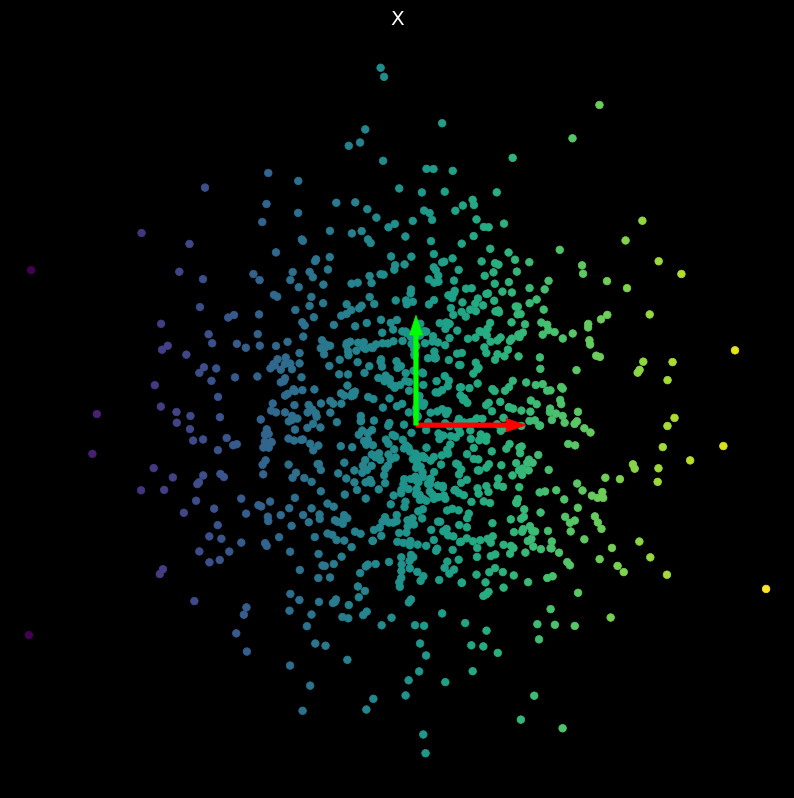

In [5]:
# generate some points in 2-D space
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)

In [ ]:
# 可视化线性变换: torch.svd/奇异值
for i in range(10): # 这里只展示一个
    # create a random matrix
    W = torch.randn(2, 2).to(device)
    # transform points
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    # transform the basis
    new_OI = OI @ W.t()
    # plot old and new basis
    # plot_bases(OI)
    plot_bases(new_OI)

In [ ]:
# 利用nn.Linear
model = nn.Sequential(
        nn.Linear(2, 2, bias=False)
)
model.to(device)
with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors)
    plot_bases(model(OI))

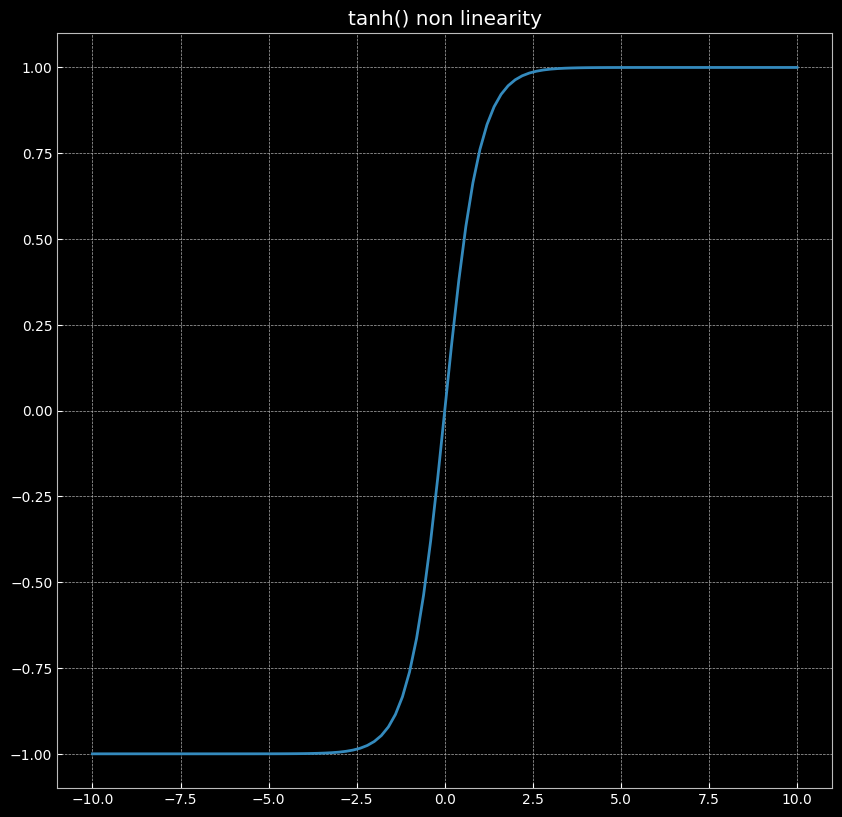

In [11]:
# 将点映射到一个square: 先使用一个因子s stretch，再使用tanh函数挤压squash
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plot(z.numpy(), s.numpy())
title('tanh() non linearity');

In [ ]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh()
)

model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

In [ ]:
# 可视化由随机神经网络表示的函数
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    # create 1-layer neural networks with random weights
    model = nn.Sequential(
            nn.Linear(2, n_hidden), 
            NL, 
            nn.Linear(n_hidden, 2)
        )
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')
#     plot_bases(OI)

In [ ]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, colors, title='f(x)')

## torch.nn

### 卷积

In [2]:
# torch.nn.Conv2d(channels, output, height_of_filter, width_of_filter) 输入的形状[ batch_size, channels, height_of_image, width_of_image ]
x = torch.randn(2,1,7,3)
conv = torch.nn.Conv2d(1,8,(2,3)) # height_of_filter, width_of_filter也可由一个值kernel_size给出；stride步长参数也可由一个元组或一个值给出
res = conv(x)
print(res.shape) # 输出的高和宽分别是height_of_image-height_of_filter+1, width_of_image-width_of_filter+1

torch.Size([2, 8, 6, 1])


In [5]:
input = torch.randn(20, 16, 50, 100)
m = nn.Conv2d(16, 33, 3, stride=2) # With square kernels and equal stride  
print(m(input).shape)  # 输出的高和宽需要除以stride再+1

torch.Size([20, 33, 24, 49])


In [6]:
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2)) # padding是在输入的两边添加0
print(m(input).shape)

torch.Size([20, 33, 28, 100])


In [7]:
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1)) # dilation指核元素之间的Spacing，默认为1，如height_of_filter=(height_of_filter-1)*dilation+1
print(m(input).shape)

torch.Size([20, 33, 26, 100])


### 池化

In [ ]:
# 提取重要信息的操作，可以去掉不重要的信息，减少计算开销
# torch.nn.MaxPool2d 参数情况可类比nn.Conv2d

### RNN

In [2]:
# nn.LSTM(input_size, hidden_size, num_layers=1, bias=True, batch_first=False, dropout=0, bidirectional=False)
    # 输入为input, (h_0, c_0) 其中input形状为(seq_len, batch, input_size)；h_0, c_0形状均为(num_layers * num_directions, batch, hidden_size)
    # 输出为output, (h_n, c_n) 其中output形状为(seq_len, batch, num_directions * hidden_size)；h_n, c_n形状同上
rnn = nn.LSTM(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
c0 = torch.randn(2, 3, 20)
output, (hn, cn) = rnn(input, (h0, c0))
print(output.shape, hn.shape, cn.shape)

torch.Size([5, 3, 20]) torch.Size([2, 3, 20]) torch.Size([2, 3, 20])


### 其他

In [ ]:
# torch.nn.BatchNorm2d(num_features） 默认是有可学习的参数，若affine=False则无

## Pipeline

### input

In [2]:
import torchvision
import torchvision.transforms as transforms
# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)
# 也可使用自定义数据集
# custom_dataset = CustomDataset() # CustomDataset(torch.utils.data.Dataset)，需定义好__init__(self)、__getitem__(self, index)和__len__(self)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

Extracting data/cifar-10-python.tar.gz to data/
torch.Size([3, 32, 32])
6


### 预训练模型

In [3]:
# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/yaoqf/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



torch.Size([64, 100])


### 存储和下载模型

In [4]:
# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

<All keys matched successfully>